## Try knocking out some frequency bands
## maybe Merged456 will work better?

In [2]:
# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

import scipy.io as sio
# from URL_download_2 import gdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import autokeras as ak
from keras.datasets import mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

from sys import getsizeof
print(getsizeof(X_train))
clf = ak.ImageClassifier(verbose=True, augment=False)
clf.fit(X_train, Y_train)
results = clf.predict(X_test)

144
Initializing search.
Initialization finished.
Training model  0


In [2]:
def download_data_from_GDRIVE():
    # imports the custom GDrive downloader library:
    # provide file ID:
    file_id = '1YPr_K8xSuKghONozyjnVThe47EsiDEZj'

    # instantiate class (create a class instance):
    G = gdown()

    # Download data from Google Drive as necessary:
    G.download_file(file_id)

def group_frequency_bands(X):
    X_ = np.zeros([X.shape[0],X.shape[1],X.shape[2], 2])
#     X_[:,:,:,0] = np.mean(X[:,:,:,3:6],axis=3)
#     X_[:,:,:,1] = np.mean(X[:,:,:,7:11],axis=3)
#     X_[:,:,:,2] = np.mean(X[:,:,:,12:29],axis=3)
    
#     processing frequencies: 0 16
#     processing frequencies: 16 32
#     processing frequencies: 32 49
#     processing frequencies: 49 65
#     X_[:,:,:,0] = np.mean(X[:,:,:,0:16],axis=3)
#     X_[:,:,:,1] = np.mean(X[:,:,:,16:32],axis=3)
    X_[:,:,:,0] = np.mean(X[:,:,:,32:49],axis=3)
    X_[:,:,:,1] = np.mean(X[:,:,:,49:65],axis=3)
    
    X_.shape
    # subplot(1,3,1)
    # imagesc(squeeze(mean(X(1,:,:,4:7), 4)))
    # title('Theta')

    # subplot(1,3,2)
    # imagesc(squeeze(mean(X(1,:,:,8:12), 4)))
    # title('Alpha')

    # subplot(1,3,3)
    # imagesc(squeeze(mean(X(1,:,:,13:30), 4)))
    # title('Beta')
    return X_

def im_resize(X_, height, width):
    
    if width>0 and height>0:
        X__ = np.zeros([X_.shape[0], height, width, X_.shape[3]])
        for i in range(X_.shape[0]):
                for j in range(X_.shape[3]):
                    im = Image.fromarray(X_[i,:,:,j])
                    X__[i,:,:,j] = im.resize((height, width), Image.ANTIALIAS)
        print (X__.shape)

        plt.subplot(121)
        plt.imshow(np.array(X_[200,:,:,1]))
        plt.subplot(122)
        plt.imshow(np.array(X__[200,:,:,1]))
    else:
        print('IMAGES NOT RESIZED')
    return X__

def downsample_frequency_domain(n_bins):
    print('Downsampling the frequency domain from', X.shape[3],'to', n_bins)
    xx = np.zeros([X.shape[0],X.shape[1],X.shape[2],n_bins])
    print(xx.shape)
    a = np.round(np.linspace(0,X.shape[3],n_bins+1))
    a = a.astype('uint8')
    print(a)
    for i in range(n_bins):
        xx[:,:,:,i] = np.mean(X[:,:,:,a[i]:a[i+1]], axis=3)   
        print('processing frequencies:', a[i], a[i+1])
    print(xx.shape)
    return xx

def parse_array(in_array):
    new_array = []
    for i in range(len(in_array)):
        if str(in_array[i]).find("left")>0:
            new_array.append("left")
        if str(in_array[i]).find("right")>0:
            new_array.append("right")
        if (str(in_array[i]).find("left")<0 and 
            str(in_array[i]).find("right")<0):
            print(i)
            new_array.append("unknown")
    return new_array

def find_right(Q, label):
    idx = []
    for i in range(len(Q)):
        if Q[i] == label:
            idx.append(i)
    return(idx)

In [3]:
file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat' #0.77
# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=2, TOPO, .mat' #2# #0.77
# file = 'Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat' #1# #0.76 #0.79
# file = 'EEG_ICA(-123_ICs)+proc_AUD_101_192_Merged456.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat'



# file = 'Merged123_1_64_ICA(-eyes)AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=1, TOPO, .mat'
# file = 'Merged123_75_134_ICA(-eyes)AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=2, TOPO, .mat'
# file = 'Merged123-143-202_ICA(-Eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=2, TOPO, .mat' #0.56

SHUFFLE = False
BATCH_SIZE = 20
TEST_TRAIN = 0.2
DS_FREQ = 1 #(0 1 2)
n_bins = 8
RESIZE = 1
width = 15
height = 15
SENSITIVITY = 0
knockouts = [0, 1, 2]

path = '/home/amplifier/home/DATASETS/' + file
mat_contents = sio.loadmat(path)
X = mat_contents['X']
Y = mat_contents['Z']
# Z = mat_contents['Z']
Q = parse_array(mat_contents['Q'])

In [14]:
# IN THIS IS CELL WE'RE CONCATENATING THE DATASETS:
SHUFFLE = False
BATCH_SIZE = 20
TEST_TRAIN = 0.2
DS_FREQ = 1 #(0 1 2)
n_bins = 8
RESIZE = 1
width = 15
height = 15
SENSITIVITY = 0
knockouts = [0, 1, 2]

X = list()
Y = list()
Q = list()
# 'EEG_ICA(-123_ICs)+proc_AUD_101_192_Merged456.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat'
# 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat',
# 'EEG_ICA(-123_ICs)+proc_AUD_101_192_Merged456.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat'
files = list(['Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat'])

for file_name in files:
    path = '/home/amplifier/home/DATASETS/' + file_name
    print (path)
    mat_contents = sio.loadmat(path)
    X.append(mat_contents['X'])
    Y.append(mat_contents['Z'])
    Q.append(parse_array(mat_contents['Q']))
    
print('Concatenating datasets...')
X = np.concatenate(X, axis=0)
Y = np.concatenate(Y, axis=0)
Q = np.concatenate(Q,axis=0)


/home/amplifier/home/DATASETS/Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat
Concatenating datasets...


Downsampling the frequency domain from 65 to 8
(450, 67, 67, 8)
[ 0  8 16 24 32 41 49 57 65]
processing frequencies: 0 8
processing frequencies: 8 16
processing frequencies: 16 24
processing frequencies: 24 32
processing frequencies: 32 41
processing frequencies: 41 49
processing frequencies: 49 57
processing frequencies: 57 65
(450, 67, 67, 8)
Downsampled Frequency Domain shape (450, 67, 67, 8)
(450, 15, 15, 8)
Resized shape (450, 15, 15, 8)
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Original data type: float64
y_test.shape before (90, 1)
y_test.shape after (90, 2)
Normalized data type: float16
Prepped test input shape (90, 15, 15, 8) Noralized MEAN: 0.09375 min -0.02908 max 1.109
Prepped train input shape (360, 15, 15, 8) Normalized MEAN: 0.0941 min -0.0571 max 2.4
Prepped test labels shape (90, 2) Normalized MEAN: 0.5 min 0.0 max 1.0
Prepped train labels shape (360, 2) Normalized MEAN: 0.5 min 0.0 max 1.0
EEG in dataset: (450, 15, 15, 8)
Labels i

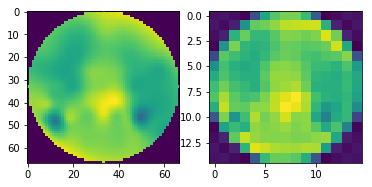

In [4]:
if DS_FREQ==1:
    X = downsample_frequency_domain(n_bins)
    print('Downsampled Frequency Domain shape', X.shape)
if DS_FREQ==2:
    X = group_frequency_bands(X)
    print('Grouped Frequency Bands shape', X.shape)
if RESIZE==1:
    X = im_resize(X, height, width)
    print('Resized shape', X.shape)

if SENSITIVITY==1:
    X = np.delete(X, knockouts, axis=3)
    print('sens', X.shape)
if X.shape[1]<X.shape[2]:
    X = np.transpose(X,[0,2,1])

if Y.shape[1] > Y.shape[0]:
    Y = Y.T
    
# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)

print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
x_train, x_test, y_train, y_test, q_train, q_test = train_test_split(X, Y, Q, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)


# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')
print('y_test.shape before', y_test.shape)


# # normalize to unit variance and zero mean:
# for i in range(x_train.shape[0]):
#     for j in range(x_train.shape[3]):
#         x_train[i,:,:,j] = preprocessing.scale(x_train[i,:,:,j], axis=1)
#         x_train[i,:,:,j] = preprocessing.minmax_scale(x_train[i,:,:,j], axis=1)
# #     y_train[i,:] = preprocessing.scale(y_train[i,:], axis=0)
# #     y_train[i,:] = preprocessing.minmax_scale(y_train[i,:], axis=0)

# for i in range(x_test.shape[0]):
#     for j in range(x_train.shape[3]):
#         x_test[i,:,:,j] = preprocessing.scale(x_test[i,:,:,j], axis=1)
#         x_test[i,:,:,j] = preprocessing.minmax_scale(x_test[i,:,:,j], axis=1)
# #     y_test[i,:] = preprocessing.scale(y_test[i,:], axis=0)
# #     y_test[i,:] = preprocessing.minmax_scale(y_test[i,:], axis=0)
    

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)
print('y_test.shape after', y_test.shape)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
print('Normalized data type:', x_train.dtype)

leng = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
chan = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1


print('Prepped test input shape', x_test.shape, "Noralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('Prepped train input shape', x_train.shape, "Normalized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('Prepped test labels shape', y_test.shape, "Normalized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('Prepped train labels shape', y_train.shape, "Normalized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)

print('EEG in dataset:', X.shape)
print('Labels in dataset:', Y.shape)
print('Length of textual labels:', len(Q))

(450, 15, 15, 8)


Text(0.5,1,'25-30 Hz')

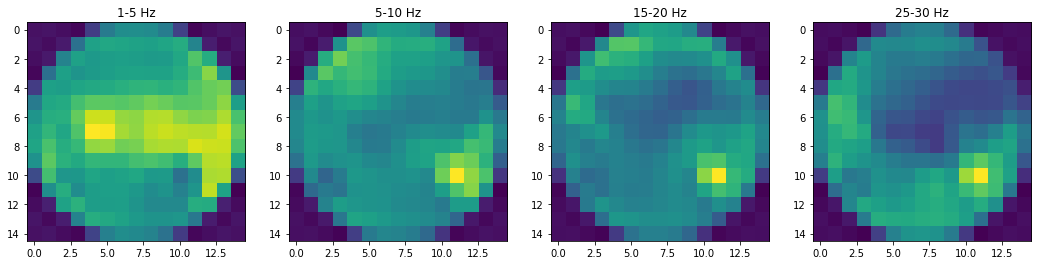

In [5]:
print(X.shape)

f, axs = plt.subplots(1,4,figsize=(18,18))

axs[0].imshow(X[100,:,:,2])
axs[0].set_title('1-5 Hz')
axs[1].imshow(X[300,:,:,4])
axs[1].set_title('5-10 Hz')
axs[2].imshow(X[300,:,:,6])
axs[2].set_title('15-20 Hz')
axs[3].imshow(X[300,:,:,7])
axs[3].set_title('25-30 Hz')

In [15]:
dilation_rate = 1

def activation():
    return ELU(alpha=1.0) # Activation('relu') #

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, ELU
from keras.models import Model
from keras.callbacks import TensorBoard, EarlyStopping
from keras.optimizers import Adam

sh = x_train.shape


input_img = Input(shape=(sh[1], sh[2], sh[3]))  # adapt this if using `channels_first` image data format

x = Conv2D(30, (3, 3), activation='relu', padding='same', dilation_rate=dilation_rate)(input_img)
x = BatchNormalization()(x)
x = Conv2D(30, (3, 3), activation='relu', padding='same', dilation_rate=dilation_rate)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(60, (3, 3), activation='relu', padding='same', dilation_rate=dilation_rate)(x)
x = BatchNormalization()(x)
x = Conv2D(60, (3, 3), activation='relu', padding='same', dilation_rate=dilation_rate)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(120, (2, 2), activation='relu', padding='same', dilation_rate=dilation_rate)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2, activation='softmax')(x)

model = Model(input_img, x)
optimizer=Adam(0.00006)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 30)        2190      
_________________________________________________________________
batch_normalization_15 (Batc (None, 15, 15, 30)        120       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 30)        8130      
_________________________________________________________________
batch_normalization_16 (Batc (None, 15, 15, 30)        120       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 60)          16260     
__________

In [16]:
init_lr = 0.00005
lr_drop_by = 0.995
drop_every = 10

# Training time!
# Try 20 epochs using batch size = 3, then switch to 4
from keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler, Callback, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')

K.set_value(model.optimizer.lr, init_lr)

def step_decay(epoch, init_lr=init_lr, lr_drop=lr_drop_by, drop_every=drop_every):
    if epoch%drop_every==0:
        lrate = init_lr * (lr_drop_by ** np.floor((1+epoch)/drop_every))
    else:
        lrate = K.get_value(model.optimizer.lr)
    print('CHECK', epoch%drop_every)
    return lrate

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        self.batch_loss = []
        self.val_acc = []
 
    def on_epoch_end(self, epoch, batch, logs={}):
        lrate = step_decay(epoch)
        txt = K.get_value(model.optimizer.lr)
        self.lr.append(txt)
#         self.lr.append(lrate)
#         txt = K.eval(self.model.optimizer.lr)
        print('OPTIMIZERS lrate AT EPOCH END = ', txt, '\n\n')
    
    def on_epoch_begin(self, epoch, batch, logs={}):
        txt = K.get_value(model.optimizer.lr)
        print('OPTIMIZERS lrate AT EPOCH START = ', txt)

    def on_batch_end(self, batch, logs={}):
        self.batch_loss.append(logs.get('loss'))

lr_decay = LearningRateScheduler(schedule=step_decay)
loss_history = LossHistory()

early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')
checkpointer = ModelCheckpoint(filepath='/home/amplifier/home/NEW_DL/weights/IMG_net_2_wts_autoKeras.h5',
                               verbose=1,
                               monitor='val_acc',
                               save_best_only=True)

train_history = model.fit(x_train, y_train,
                epochs=300,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[checkpointer, early_stopping, lr_decay, loss_history])

Train on 360 samples, validate on 90 samples
Epoch 1/300
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  5e-05
360/360 [==============================] - 3s 9ms/step - loss: 0.7882 - acc: 0.5389 - val_loss: 0.7030 - val_acc: 0.5111

Epoch 00001: val_acc improved from -inf to 0.51111, saving model to /home/amplifier/home/NEW_DL/weights/IMG_net_2_wts_autoKeras.h5
CHECK 0
OPTIMIZERS lrate AT EPOCH END =  5e-05 


Epoch 2/300
CHECK 1
OPTIMIZERS lrate AT EPOCH START =  5e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.7222 - acc: 0.5639 - val_loss: 0.7028 - val_acc: 0.5222

Epoch 00002: val_acc improved from 0.51111 to 0.52222, saving model to /home/amplifier/home/NEW_DL/weights/IMG_net_2_wts_autoKeras.h5
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  5e-05 


Epoch 3/300
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  5e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.7659 - acc: 0.5306 - val_loss: 0.6969 - val_acc: 0.5111

Epoch 00003: val_acc did not improve from

360/360 [==============================] - 2s 6ms/step - loss: 0.6647 - acc: 0.6194 - val_loss: 0.6630 - val_acc: 0.5889

Epoch 00027: val_acc did not improve from 0.60000
CHECK 6
OPTIMIZERS lrate AT EPOCH END =  4.9253744e-05 


Epoch 28/300
CHECK 7
OPTIMIZERS lrate AT EPOCH START =  4.9253744e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.6667 - acc: 0.6250 - val_loss: 0.6543 - val_acc: 0.5889

Epoch 00028: val_acc did not improve from 0.60000
CHECK 7
OPTIMIZERS lrate AT EPOCH END =  4.9253744e-05 


Epoch 29/300
CHECK 8
OPTIMIZERS lrate AT EPOCH START =  4.9253744e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.7079 - acc: 0.5639 - val_loss: 0.6519 - val_acc: 0.5889

Epoch 00029: val_acc did not improve from 0.60000
CHECK 8
OPTIMIZERS lrate AT EPOCH END =  4.9253744e-05 


Epoch 30/300
CHECK 9
OPTIMIZERS lrate AT EPOCH START =  4.9253744e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.6670 - acc: 0.6194 - val_loss: 0.65

360/360 [==============================] - 2s 6ms/step - loss: 0.6220 - acc: 0.6472 - val_loss: 0.6222 - val_acc: 0.6667

Epoch 00052: val_acc did not improve from 0.70000
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  4.637845e-05 


Epoch 53/300
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  4.637845e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.5860 - acc: 0.7028 - val_loss: 0.6282 - val_acc: 0.6444

Epoch 00053: val_acc did not improve from 0.70000
CHECK 2
OPTIMIZERS lrate AT EPOCH END =  4.637845e-05 


Epoch 54/300
CHECK 3
OPTIMIZERS lrate AT EPOCH START =  4.637845e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.5871 - acc: 0.6861 - val_loss: 0.6217 - val_acc: 0.6667

Epoch 00054: val_acc did not improve from 0.70000
CHECK 3
OPTIMIZERS lrate AT EPOCH END =  4.637845e-05 


Epoch 55/300
CHECK 4
OPTIMIZERS lrate AT EPOCH START =  4.637845e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.6031 - acc: 0.6917 - val_loss: 0.6239 - v

360/360 [==============================] - 2s 6ms/step - loss: 0.5005 - acc: 0.7389 - val_loss: 0.5785 - val_acc: 0.6889

Epoch 00079: val_acc did not improve from 0.71111
CHECK 8
OPTIMIZERS lrate AT EPOCH END =  4.3452652e-05 


Epoch 80/300
CHECK 9
OPTIMIZERS lrate AT EPOCH START =  4.3452652e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.5249 - acc: 0.7611 - val_loss: 0.5708 - val_acc: 0.7000

Epoch 00080: val_acc did not improve from 0.71111
CHECK 9
OPTIMIZERS lrate AT EPOCH END =  4.3452652e-05 


Epoch 81/300
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  4.174466e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.5217 - acc: 0.7472 - val_loss: 0.5686 - val_acc: 0.7000

Epoch 00081: val_acc did not improve from 0.71111
CHECK 0
OPTIMIZERS lrate AT EPOCH END =  4.174466e-05 


Epoch 82/300
CHECK 1
OPTIMIZERS lrate AT EPOCH START =  4.174466e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.5028 - acc: 0.7778 - val_loss: 0.5812 

360/360 [==============================] - 2s 6ms/step - loss: 0.4377 - acc: 0.8306 - val_loss: 0.5513 - val_acc: 0.7333

Epoch 00106: val_acc did not improve from 0.73333
CHECK 5
OPTIMIZERS lrate AT EPOCH END =  3.795242e-05 


Epoch 107/300
CHECK 6
OPTIMIZERS lrate AT EPOCH START =  3.795242e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.4350 - acc: 0.8222 - val_loss: 0.5440 - val_acc: 0.7333

Epoch 00107: val_acc did not improve from 0.73333
CHECK 6
OPTIMIZERS lrate AT EPOCH END =  3.795242e-05 


Epoch 108/300
CHECK 7
OPTIMIZERS lrate AT EPOCH START =  3.795242e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.4322 - acc: 0.8028 - val_loss: 0.5449 - val_acc: 0.7333

Epoch 00108: val_acc did not improve from 0.73333
CHECK 7
OPTIMIZERS lrate AT EPOCH END =  3.795242e-05 


Epoch 109/300
CHECK 8
OPTIMIZERS lrate AT EPOCH START =  3.795242e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.4496 - acc: 0.7917 - val_loss: 0.5369 

360/360 [==============================] - 2s 6ms/step - loss: 0.3375 - acc: 0.8750 - val_loss: 0.5360 - val_acc: 0.7222

Epoch 00133: val_acc did not improve from 0.75556
CHECK 2
OPTIMIZERS lrate AT EPOCH END =  3.1686217e-05 


Epoch 134/300
CHECK 3
OPTIMIZERS lrate AT EPOCH START =  3.1686217e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.3277 - acc: 0.8833 - val_loss: 0.5393 - val_acc: 0.7222

Epoch 00134: val_acc did not improve from 0.75556
CHECK 3
OPTIMIZERS lrate AT EPOCH END =  3.1686217e-05 


Epoch 135/300
CHECK 4
OPTIMIZERS lrate AT EPOCH START =  3.1686217e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.3327 - acc: 0.8833 - val_loss: 0.5262 - val_acc: 0.7222

Epoch 00135: val_acc did not improve from 0.75556
CHECK 4
OPTIMIZERS lrate AT EPOCH END =  3.1686217e-05 


Epoch 136/300
CHECK 5
OPTIMIZERS lrate AT EPOCH START =  3.1686217e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.3590 - acc: 0.8750 - val_loss: 0

360/360 [==============================] - 2s 6ms/step - loss: 0.2770 - acc: 0.9111 - val_loss: 0.5428 - val_acc: 0.7111

Epoch 00160: val_acc did not improve from 0.75556
CHECK 9
OPTIMIZERS lrate AT EPOCH END =  2.7399316e-05 


Epoch 161/300
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  2.5287682e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.2775 - acc: 0.9028 - val_loss: 0.5200 - val_acc: 0.7333

Epoch 00161: val_acc did not improve from 0.75556
CHECK 0
OPTIMIZERS lrate AT EPOCH END =  2.5287682e-05 


Epoch 162/300
CHECK 1
OPTIMIZERS lrate AT EPOCH START =  2.5287682e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.2612 - acc: 0.9389 - val_loss: 0.5274 - val_acc: 0.7333

Epoch 00162: val_acc did not improve from 0.75556
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  2.5287682e-05 


Epoch 163/300
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  2.5287682e-05
360/360 [==============================] - 2s 6ms/step - loss: 0.2779 - acc: 0.9000 - val_loss: 0

KeyboardInterrupt: 

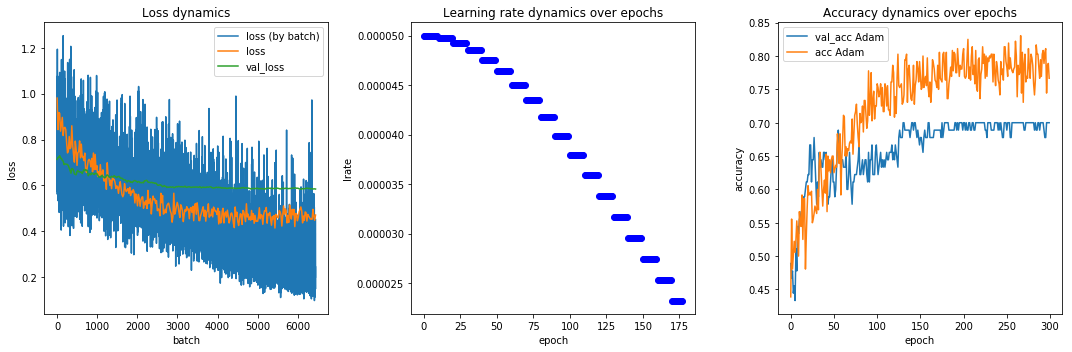

In [17]:
f, axs = plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
plt.plot(loss_history.batch_loss)
tic = np.linspace(0, len(loss_history.batch_loss), len(train_history.history['val_loss']))
plt.plot(tic, train_history.history['loss'])
plt.plot(tic, train_history.history['val_loss'])
plt.title('Loss dynamics')
plt.ylabel('loss')
plt.xlabel('batch')
plt.legend(['loss (by batch)', 'loss', 'val_loss'])

plt.subplot(132)
plt.plot(loss_history.lr,'bo')
plt.title('Learning rate dynamics over epochs')
plt.ylabel('lrate')
plt.xlabel('epoch')

asa = []
optimizer_name = model.optimizer.__class__.__name__
plt.subplot(133)
plt.plot(train_history.history['val_acc'])
plt.plot(train_history.history['acc'])
asa.append('val_acc ' + optimizer_name)
asa.append('acc ' + optimizer_name)
plt.title('Accuracy dynamics over epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(asa)

plt.tight_layout()

In [ ]:
model.load_weights('/home/amplifier/home/NEW_DL/weights/IMG_net_2_wts.h5')
# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train)
decoded_test = model.predict(x_test)
print(decoded_train.shape)
print(decoded_test.shape)

# now test sample by sample
cor_test = []
L = x_test.shape
for sample_no in range(x_test.shape[0]):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_test[sample_no,0] < y_test[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) and (y_test[sample_no,0] > y_test[sample_no,1]))):
        cor_test.append(1)
    else:
        cor_test.append(0)

cor_train = []
L = x_train.shape
for sample_no in range(x_train.shape[0]):
    pred = model.predict(np.expand_dims(x_train[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_train[sample_no,0] < y_train[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) and (y_train[sample_no,0] > y_train[sample_no,1]))):
        cor_train.append(1)
    else:
        cor_train.append(0)

# Report accuracies
print('Accuracy on the test data:', np.mean(cor_test))
print('Accuracy on the training data:', np.mean(cor_train))

In [21]:
# save cor_test as csv for future analysis:
import csv
with open('img_test.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(cor_test)

In [11]:
file = '1+2, see desc.'

In [12]:
import pandas as pd
df_ = pd.DataFrame(columns=['algorithm',
                           'SHUFFLE',
                           'BATCH_SIZE',
                           'TEST_TRAIN',
                           'DS_FREQ',
                           'n_bins',
                           'RESIZE',
                           'width',
                           'height',
                           'SENSITIVITY',
                           'dataset',
                           'val_acc',
                           'acc'])

df_.loc[0] = ['TOPO',
              SHUFFLE,
              BATCH_SIZE,
              TEST_TRAIN,
              DS_FREQ,
              n_bins,
              RESIZE,
              width,
              height,
              str(knockouts),
              file,
              np.mean(cor_test),
              np.mean(cor_train)]
# df.to_csv('/home/amplifier/home/NEW_DL/weights/blank_document.csv', index=False)
df = pd.read_csv('/home/amplifier/home/NEW_DL/weights/performances.csv')
df = df.append(df_, ignore_index=True)
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.to_csv('/home/amplifier/home/NEW_DL/weights/performances.csv', index=False)
df = pd.read_csv('/home/amplifier/home/NEW_DL/weights/performances.csv')
display(df)

,algorithm,SHUFFLE,BATCH_SIZE,TEST_TRAIN,DS_FREQ,n_bins,RESIZE,width,height,SENSITIVITY,dataset,val_acc,acc
0,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS...",0.766667,0.961111
1,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS...",0.788889,0.805556
2,TOPO,False,20,0.2,1,8,1,15,15,1,EEG_ICA(-123_ICs)+proc_AUD_101_192_Merged456.m...,0.580645,0.973118
3,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, D...",0.800000,0.963889
4,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged123_1_64_ICA(-eyes)AUDpreproc.mat, DS2=6...",0.666667,0.881944
5,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged123_75_134_ICA(-eyes)AUDpreproc.mat, DS2...",0.591716,0.599702
6,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS...",0.722222,0.591667
7,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS...",0.755556,0.655556
8,TOPO,False,20,0.2,1,8,1,15,15,1,"Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS...",0.755556,0.666667
9,TOPO,False,20,0.2,1,8,1,15,15,2,"Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS...",0.777778,0.708333


In [94]:
# # to CLEAR all the data in the dataframe and save
# df = df[:0]
# df.to_csv('/home/amplifier/home/NEW_DL/weights/performances.csv', index=False)
# df.head()

# df.drop_duplicates(subset=None, keep='first', inplace=True)
# df.head()

Sample: 0 Prediction: [[ 0.96013433  0.03986574]] Ground Truth [ 0.  1.] right
Sample: 1 Prediction: [[ 0.25404075  0.74595928]] Ground Truth [ 0.  1.] right
Sample: 2 Prediction: [[ 0.32668161  0.67331839]] Ground Truth [ 0.  1.] right
Sample: 3 Prediction: [[ 0.74391818  0.25608185]] Ground Truth [ 0.  1.] right
Sample: 4 Prediction: [[ 0.60861325  0.39138672]] Ground Truth [ 0.  1.] right
Sample: 5 Prediction: [[ 0.3831735   0.61682653]] Ground Truth [ 0.  1.] right
Sample: 6 Prediction: [[ 0.49828056  0.50171942]] Ground Truth [ 0.  1.] right
Sample: 7 Prediction: [[ 0.41862848  0.58137155]] Ground Truth [ 0.  1.] right
Sample: 8 Prediction: [[ 0.35809729  0.64190269]] Ground Truth [ 0.  1.] right
Sample: 9 Prediction: [[ 0.47699139  0.52300864]] Ground Truth [ 0.  1.] right
Sample: 10 Prediction: [[ 0.37415457  0.62584543]] Ground Truth [ 0.  1.] right
Sample: 11 Prediction: [[ 0.39874229  0.60125768]] Ground Truth [ 0.  1.] right
Sample: 12 Prediction: [[ 0.44023103  0.55976897]]

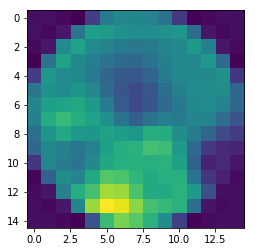

In [95]:
for sample_no in range(70):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    print('Sample:', sample_no, 'Prediction:', pred, 'Ground Truth', y_test[sample_no], q_test[sample_no])
sample_no = 2

plt.imshow(x_test[sample_no,:,:,2].astype('float64'))

Text(0.5,0.98,'Topographies ')

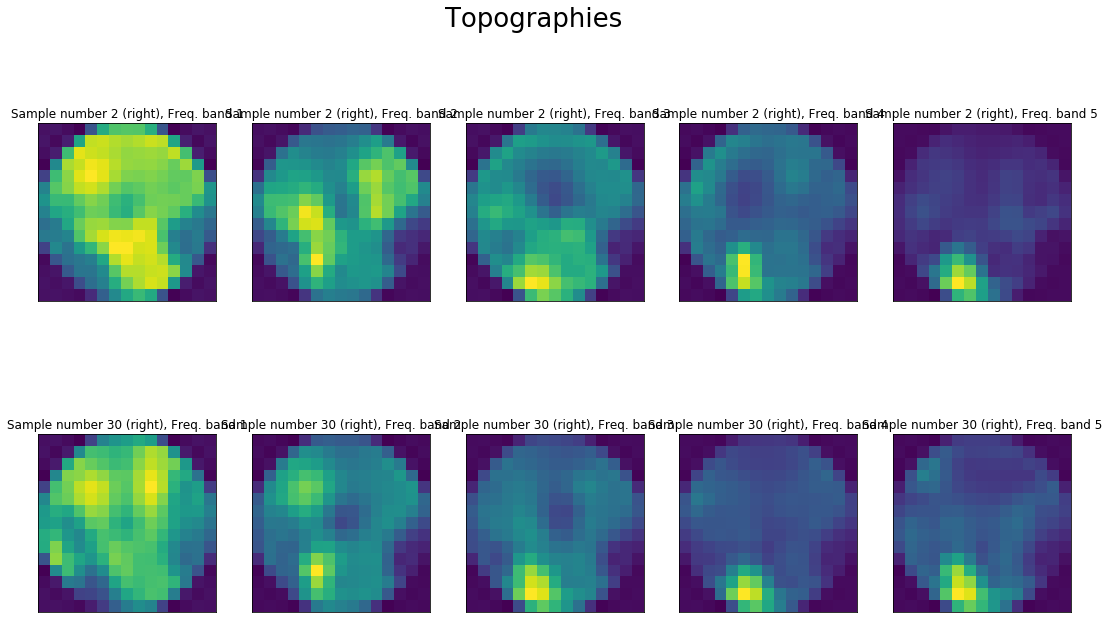

In [96]:
sample_nos = [2, 30]
I = 2
J = x_test.shape[3]
c = 0
fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        axs[c].imshow(x_test[sample_nos[i],:,:,j].astype('float64'))
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title('Sample number ' + str(sample_nos[i]) + ' (' + q_test[sample_nos[i]] + '), Freq. band ' + str(j+1))
        c = c + 1
plt.suptitle('Topographies ', fontsize=26)

Text(0.5,0.98,'Topographies Averaged within Classes ')

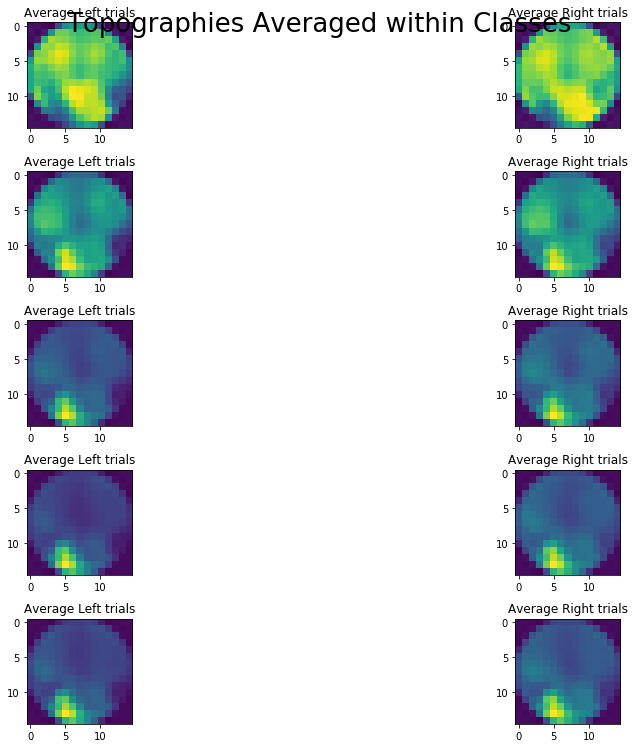

In [97]:

avg_right = np.zeros([height, width, x_test.shape[3]])
avg_left = np.zeros([height, width, x_test.shape[3]])

for b in range(x_test.shape[3]):
    avg_right[:,:,b] = np.mean(x_test[np.array(find_right(q_test, label='right')),:,:,b],axis=0)
    avg_left[:,:,b] = np.mean(x_test[np.array(find_right(q_test, label='left')),:,:,b],axis=0)

I = x_test.shape[3]
J = 2

fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()

c = 0
for b in range(x_test.shape[3]):
    axs[c].imshow(avg_left[:,:,b].astype('float64'))
    axs[c].set_title('Average Left trials')
    c = c + 1
    axs[c].imshow(avg_right[:,:,b].astype('float64'))
    axs[c].set_title('Average Right trials')
    c = c + 1
#         axs[c].get_xaxis().set_visible(False)
#         axs[c].get_yaxis().set_visible(False)        
#         axs[c].set_title('Sample number ' + str(sample_nos[i]) + ' (' + q_test[sample_nos[i]] + '), Freq. band ' + str(j+1))
plt.tight_layout()
plt.suptitle('Topographies Averaged within Classes ', fontsize=26)